Análise dados de ocupação e preços de anúncios do Airbnb 

### Libraries 

In [1]:
import pandas as pd
from datetime import datetime 
from datetime import date

#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loader

In [2]:
price = pd.read_csv("/home/ives/Desktop/Seazone/data/desafio_priceav.csv")

In [3]:
price

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0
...,...,...,...,...,...,...,...
354515,64596,4298115,40199361,blank,2021-03-26,200.0,0
354516,64597,4298116,40199361,blank,2021-03-27,200.0,0
354517,64598,4298117,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1
354518,64599,4298118,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1


In [4]:
detail = pd.read_csv("/home/ives/Desktop/Seazone/data/desafio_details.csv")

In [5]:
detail

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0
...,...,...,...,...,...,...,...,...,...
4686,4686,34392248,Ingleses,Lindo e acogedor apto en zona norte de la Isla,2.0,2.0,NaN,False,0.0
4687,4687,44538969,Canasvieiras,"Ótimo apto no centro de Canas, a 450m do mar",1.0,1.0,NaN,False,0.0
4688,4688,16609826,Jurerê,Agradável Apartamento em Jurerê Internacional,3.0,2.0,5.0,True,30.0
4689,4689,31239515,Canasvieiras,Cobertura no centro 3 dormitorios com AR.,3.0,2.0,NaN,True,2.0


### Data preprocessing 

#### PRICE

In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354520 entries, 0 to 354519
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         354520 non-null  int64  
 1   Unnamed: 0.1       354520 non-null  int64  
 2   airbnb_listing_id  354520 non-null  int64  
 3   booked_on          354520 non-null  object 
 4   date               354520 non-null  object 
 5   price_string       354520 non-null  float64
 6   occupied           354520 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 18.9+ MB


In [7]:
# Excluir colunas Unnamed: 0 e Unnamed: 0.1
price = price.drop("Unnamed: 0", axis = 1)
price = price.drop("Unnamed: 0.1", axis =1)
# Mudar nomes das colunas:

# Mudar formato da coluna booked_on para date

# Mudar formato da coluna date para date

In [8]:
# Mudar nomes das colunas:
price.columns = ["id_anuncio","alugado","data_prev","preco","disponibilidade"]

In [9]:
price

,id_anuncio,alugado,data_prev,preco,disponibilidade
0,40201349,blank,2020-11-15,250.0,0
1,40201349,blank,2020-11-26,250.0,0
2,40201349,blank,2020-11-27,250.0,0
3,40201349,blank,2020-12-10,250.0,0
4,40201349,blank,2021-02-01,250.0,0
...,...,...,...,...,...
354515,40199361,blank,2021-03-26,200.0,0
354516,40199361,blank,2021-03-27,200.0,0
354517,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1
354518,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1


In [10]:
price['alugado'].value_counts()

blank                  189569
2020-10-16 00:00:00      5409
2020-12-01 00:00:00      3274
2020-11-10 00:00:00      2524
2020-04-01 00:00:00      2506
                        ...  
2020-02-07 00:00:00         4
2020-05-11 00:00:00         3
2000-01-01 00:00:00         3
2020-05-06 00:00:00         1
2020-02-15 00:00:00         1
Name: alugado, Length: 234, dtype: int64

In [11]:
# Mudar formato da coluna date para date
price['data_prev'] = pd.to_datetime(price["data_prev"], format="%Y-%m-%d")

#### DETAIL

In [12]:
detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4691 non-null   int64  
 1   airbnb_listing_id    4691 non-null   int64  
 2   suburb               4691 non-null   object 
 3   ad_name              4691 non-null   object 
 4   number_of_bedrooms   4508 non-null   float64
 5   number_of_bathrooms  4690 non-null   float64
 6   star_rating          2570 non-null   float64
 7   is_superhost         4691 non-null   bool   
 8   number_of_reviews    4684 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 297.9+ KB


In [13]:
# Excluir coluna Unnamed: 0 
detail = detail.drop('Unnamed: 0', axis=1)



In [14]:
detail.columns

Index(['airbnb_listing_id', 'suburb', 'ad_name', 'number_of_bedrooms',
       'number_of_bathrooms', 'star_rating', 'is_superhost',
       'number_of_reviews'],
      dtype='object')

In [15]:
# Mudar nomes das colunas


In [16]:
detail.columns = ["id_anuncio","bairro","titulo","num_quartos","num_banheiros","nota","superusuario","num_comentarios"]

In [17]:
detail

,id_anuncio,bairro,titulo,num_quartos,num_banheiros,nota,superusuario,num_comentarios
0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0
...,...,...,...,...,...,...,...,...
4686,34392248,Ingleses,Lindo e acogedor apto en zona norte de la Isla,2.0,2.0,NaN,False,0.0
4687,44538969,Canasvieiras,"Ótimo apto no centro de Canas, a 450m do mar",1.0,1.0,NaN,False,0.0
4688,16609826,Jurerê,Agradável Apartamento em Jurerê Internacional,3.0,2.0,5.0,True,30.0
4689,31239515,Canasvieiras,Cobertura no centro 3 dormitorios com AR.,3.0,2.0,NaN,True,2.0


#### 1. Ordene os bairros em ordem crescente de número de anúncios:

In [18]:
ordem_bairros=detail['bairro'].value_counts().sort_values(ascending=True)
ordem_bairros

Centro                 278
Lagoa da Conceição     309
Jurerê                 539
Canasvieiras          1177
Ingleses              2388
Name: bairro, dtype: int64

In [19]:
cores = ["#FF5A60","#494331","#fcbf49","#878472","#de541e","#FF5A60"]

<ipython-input-20-bb1e3f2983e8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)    # Mudar o label x


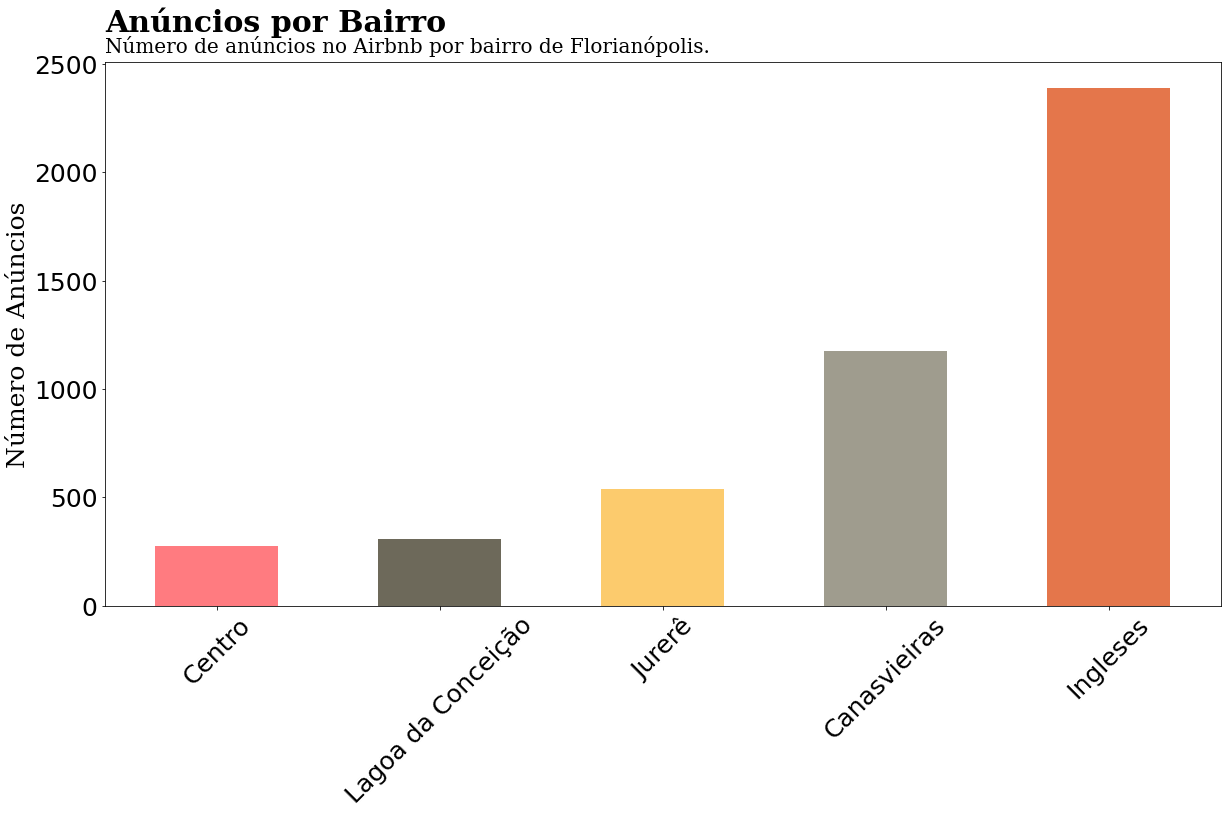

In [20]:
# Plot:
labels = ordem_bairros.index

#df=df_cover_esti_ther_cover[2020].sort_values(ascending=False)
fig, ax1 = plt.subplots(1,1, figsize=(20, 10))
ax1.bar( ordem_bairros.index,ordem_bairros, width=0.55, color=cores, alpha=0.8)
#ax.bar(data.index,data , width=0.55, color='#990000', alpha=0.8, label='Female')
#ax1.set_ylim(0, 1000000)
#ax1.set_xlim(1990, 2021)
ax1.set_xticklabels(labels)    # Mudar o label x 

# Format:

ax1.tick_params(labelsize=25)
#ax1.set_xlabel('Ano',size=30,fontfamily='serif')
ax1.set_ylabel('Número de Anúncios',size=25,fontfamily='serif' )

plt.xticks(rotation=45)

# Valores nas Barras 
#for index,data in enumerate(df):
  #  plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=15),ha="center")

    
    
ax1.text(-0.50,2650, 
         'Anúncios por Bairro', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax1.text(-0.5,2550, 
         'Número de anúncios no Airbnb por bairro de Florianópolis.  ', 
         fontsize=20, 
         fontweight='light', 
         fontfamily='serif',
        )
    
    
    

#plt.show()

plt.savefig("anuncio.png", dpi=100,bbox_inches='tight')

#### 2. Ordene os bairros em ordem crescente de faturamento médio dos anúncios:


In [21]:
result = pd.merge(price, detail, on=["id_anuncio", "id_anuncio"])

In [22]:
result.head()

,id_anuncio,alugado,data_prev,preco,disponibilidade,bairro,titulo,num_quartos,num_banheiros,nota,superusuario,num_comentarios
0,40201349,blank,2020-11-15,250.0,0,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
1,40201349,blank,2020-11-26,250.0,0,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
2,40201349,blank,2020-11-27,250.0,0,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
3,40201349,blank,2020-12-10,250.0,0,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
4,40201349,blank,2021-02-01,250.0,0,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0


In [23]:
media_bai = result.groupby("bairro")["preco"].mean().sort_values(ascending=True)

In [24]:
media_bai

bairro
Centro                219.088990
Lagoa da Conceição    250.514148
Canasvieiras          292.571139
Ingleses              350.371020
Jurerê                406.074854
Name: preco, dtype: float64

<ipython-input-25-01da6e194d5b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)    # Mudar o label x


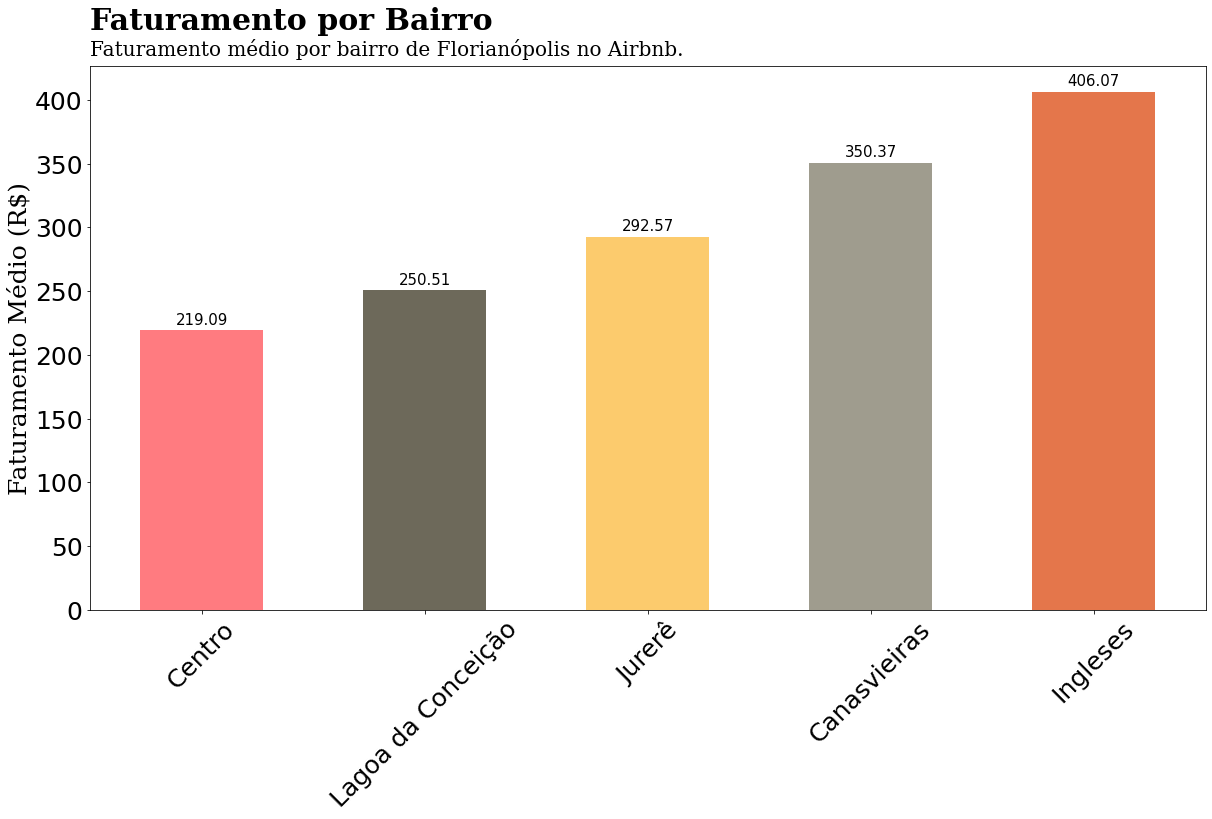

In [25]:
# Plot:
labels = ordem_bairros.index

fig, ax1 = plt.subplots(1,1, figsize=(20, 10))
ax1.bar( media_bai.index,media_bai, width=0.55, color=cores, alpha=0.8)
#ax1.set_xlim(1990, 2021)
ax1.set_xticklabels(labels)    # Mudar o label x 

# Format:

ax1.tick_params(labelsize=25)
#ax1.set_xlabel('Ano',size=30,fontfamily='serif')
ax1.set_ylabel('Faturamento Médio (R$)',size=25,fontfamily='serif' )

plt.xticks(rotation=45)

# Valores nas Barras 
for index,data in enumerate(media_bai):
    plt.text(x=index , y =data+5 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha="center")

    
    
ax1.text(-0.50,455, 
         'Faturamento por Bairro', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax1.text(-0.5,435, 
         'Faturamento médio por bairro de Florianópolis no Airbnb.  ', 
         fontsize=20, 
         fontweight='light', 
         fontfamily='serif',
        )
    
    
    

#plt.show()

plt.savefig("faturamento.png", dpi=100,bbox_inches='tight')

#### 3. Existem correlações entre as características de um anúncio e seu faturamento?


In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354520 entries, 0 to 354519
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_anuncio       354520 non-null  int64         
 1   alugado          354520 non-null  object        
 2   data_prev        354520 non-null  datetime64[ns]
 3   preco            354520 non-null  float64       
 4   disponibilidade  354520 non-null  int64         
 5   bairro           354520 non-null  object        
 6   titulo           354520 non-null  object        
 7   num_quartos      338908 non-null  float64       
 8   num_banheiros    354446 non-null  float64       
 9   nota             217529 non-null  float64       
 10  superusuario     354520 non-null  bool          
 11  num_comentarios  354093 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 32.8+ MB


In [27]:
carac =  result.drop(["id_anuncio","disponibilidade","alugado","data_prev","superusuario","titulo"], axis = 1)

In [28]:
carac

,preco,bairro,num_quartos,num_banheiros,nota,num_comentarios
0,250.0,Ingleses,2.0,2.0,NaN,0.0
1,250.0,Ingleses,2.0,2.0,NaN,0.0
2,250.0,Ingleses,2.0,2.0,NaN,0.0
3,250.0,Ingleses,2.0,2.0,NaN,0.0
4,250.0,Ingleses,2.0,2.0,NaN,0.0
...,...,...,...,...,...,...
354515,200.0,Canasvieiras,2.0,1.0,5.0,4.0
354516,200.0,Canasvieiras,2.0,1.0,5.0,4.0
354517,250.0,Canasvieiras,2.0,1.0,5.0,4.0
354518,250.0,Canasvieiras,2.0,1.0,5.0,4.0


In [29]:
cor = carac.corr()
cor 

,preco,num_quartos,num_banheiros,nota,num_comentarios
preco,1.000000,0.428481,0.429739,0.055139,-0.141430
num_quartos,0.428481,1.000000,0.744669,0.003883,-0.098852
num_banheiros,0.429739,0.744669,1.000000,0.012673,-0.099048
nota,0.055139,0.003883,0.012673,1.000000,0.113212
num_comentarios,-0.141430,-0.098852,-0.099048,0.113212,1.000000


In [30]:
df = pd.get_dummies(carac)

In [31]:
df

,preco,num_quartos,num_banheiros,nota,num_comentarios,bairro_Canasvieiras,bairro_Centro,bairro_Ingleses,bairro_Jurerê,bairro_Lagoa da Conceição
0,250.0,2.0,2.0,NaN,0.0,0,0,1,0,0
1,250.0,2.0,2.0,NaN,0.0,0,0,1,0,0
2,250.0,2.0,2.0,NaN,0.0,0,0,1,0,0
3,250.0,2.0,2.0,NaN,0.0,0,0,1,0,0
4,250.0,2.0,2.0,NaN,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
354515,200.0,2.0,1.0,5.0,4.0,1,0,0,0,0
354516,200.0,2.0,1.0,5.0,4.0,1,0,0,0,0
354517,250.0,2.0,1.0,5.0,4.0,1,0,0,0,0
354518,250.0,2.0,1.0,5.0,4.0,1,0,0,0,0


In [32]:
cor =  df.corr()

In [33]:
cor

,preco,num_quartos,num_banheiros,nota,num_comentarios,bairro_Canasvieiras,bairro_Centro,bairro_Ingleses,bairro_Jurerê,bairro_Lagoa da Conceição
preco,1.000000,0.428481,0.429739,0.055139,-0.141430,-0.114707,-0.141269,0.118637,0.155738,-0.111948
num_quartos,0.428481,1.000000,0.744669,0.003883,-0.098852,-0.125197,-0.006217,0.228954,-0.085361,-0.132250
num_banheiros,0.429739,0.744669,1.000000,0.012673,-0.099048,-0.163533,-0.059671,0.254490,-0.034332,-0.124011
nota,0.055139,0.003883,0.012673,1.000000,0.113212,-0.027947,-0.052476,0.017252,0.047158,-0.002677
num_comentarios,-0.141430,-0.098852,-0.099048,0.113212,1.000000,-0.090383,0.163219,-0.199554,0.206531,0.141211
bairro_Canasvieiras,-0.114707,-0.125197,-0.163533,-0.027947,-0.090383,1.000000,-0.141779,-0.591473,-0.219823,-0.157699
bairro_Centro,-0.141269,-0.006217,-0.059671,-0.052476,0.163219,-0.141779,1.000000,-0.238636,-0.088690,-0.063625
bairro_Ingleses,0.118637,0.228954,0.254490,0.017252,-0.199554,-0.591473,-0.238636,1.000000,-0.369997,-0.265432
bairro_Jurerê,0.155738,-0.085361,-0.034332,0.047158,0.206531,-0.219823,-0.088690,-0.369997,1.000000,-0.098649
bairro_Lagoa da Conceição,-0.111948,-0.132250,-0.124011,-0.002677,0.141211,-0.157699,-0.063625,-0.265432,-0.098649,1.000000


In [34]:
result["bairro"]= result["bairro"].map({"centro":1,"Lagoa da Conceição":2,"Canasvieiras":3,"Ingleses":4,"Jurerê":5})

In [35]:
result

,id_anuncio,alugado,data_prev,preco,disponibilidade,bairro,titulo,num_quartos,num_banheiros,nota,superusuario,num_comentarios
0,40201349,blank,2020-11-15,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
1,40201349,blank,2020-11-26,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
2,40201349,blank,2020-11-27,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
3,40201349,blank,2020-12-10,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
4,40201349,blank,2021-02-01,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
354515,40199361,blank,2021-03-26,200.0,0,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354516,40199361,blank,2021-03-27,200.0,0,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354517,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354518,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0


In [36]:
cor = result.corr()
cor

,id_anuncio,preco,disponibilidade,bairro,num_quartos,num_banheiros,nota,superusuario,num_comentarios
id_anuncio,1.000000,-0.000093,0.007241,0.027536,-0.043904,-0.040918,-0.030324,-0.117219,-0.351958
preco,-0.000093,1.000000,0.009849,0.226075,0.428481,0.429739,0.055139,-0.121490,-0.141430
disponibilidade,0.007241,0.009849,1.000000,0.014550,-0.013707,-0.007090,0.008450,0.054269,0.092328
bairro,0.027536,0.226075,0.014550,1.000000,0.124819,0.172029,0.043016,-0.016818,0.038494
num_quartos,-0.043904,0.428481,-0.013707,0.124819,1.000000,0.744669,0.003883,-0.111508,-0.098852
num_banheiros,-0.040918,0.429739,-0.007090,0.172029,0.744669,1.000000,0.012673,-0.098611,-0.099048
nota,-0.030324,0.055139,0.008450,0.043016,0.003883,0.012673,1.000000,0.263428,0.113212
superusuario,-0.117219,-0.121490,0.054269,-0.016818,-0.111508,-0.098611,0.263428,1.000000,0.340481
num_comentarios,-0.351958,-0.141430,0.092328,0.038494,-0.098852,-0.099048,0.113212,0.340481,1.000000


In [37]:
corr = result.corr(method="spearman")
corr

,id_anuncio,preco,disponibilidade,bairro,num_quartos,num_banheiros,nota,superusuario,num_comentarios
id_anuncio,1.000000,-0.007724,0.006944,0.028879,-0.034144,-0.041117,-0.050353,-0.123627,-0.410115
preco,-0.007724,1.000000,-0.004640,0.237182,0.423903,0.429609,0.103929,-0.133096,-0.205666
disponibilidade,0.006944,-0.004640,1.000000,0.013846,-0.018347,-0.008854,0.008306,0.054269,0.104496
bairro,0.028879,0.237182,0.013846,1.000000,0.128691,0.188263,0.038215,-0.017580,0.072525
num_quartos,-0.034144,0.423903,-0.018347,0.128691,1.000000,0.750910,0.044976,-0.124790,-0.097255
num_banheiros,-0.041117,0.429609,-0.008854,0.188263,0.750910,1.000000,0.042469,-0.103073,-0.083474
nota,-0.050353,0.103929,0.008306,0.038215,0.044976,0.042469,1.000000,0.332132,0.097153
superusuario,-0.123627,-0.133096,0.054269,-0.017580,-0.124790,-0.103073,0.332132,1.000000,0.436204
num_comentarios,-0.410115,-0.205666,0.104496,0.072525,-0.097255,-0.083474,0.097153,0.436204,1.000000


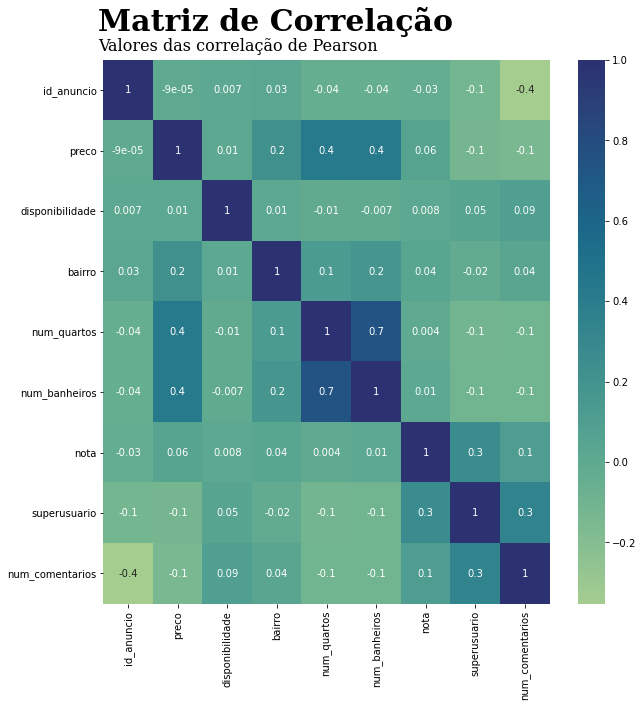

In [38]:
fig,ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize=(20, 10))

#fig, ax =plt.subplots(figsize=(20,10))


sns.heatmap(cor, annot=True, fmt='.1g',cmap='crest',)

ax.text(-0.1,-0.48, 
         'Matriz de Correlação', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif',
        )


ax.text(-0.10,-0.15, 
         'Valores das correlação de Pearson', 
         fontsize=16, 
         fontweight='light', 
         fontfamily='serif',
        )



plt.savefig("matriz_corr.png", dpi=100,bbox_inches='tight', transparent=True)




#### 4. Qual a antecedência média das reservas?

In [39]:
result

,id_anuncio,alugado,data_prev,preco,disponibilidade,bairro,titulo,num_quartos,num_banheiros,nota,superusuario,num_comentarios
0,40201349,blank,2020-11-15,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
1,40201349,blank,2020-11-26,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
2,40201349,blank,2020-11-27,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
3,40201349,blank,2020-12-10,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
4,40201349,blank,2021-02-01,250.0,0,4.0,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
354515,40199361,blank,2021-03-26,200.0,0,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354516,40199361,blank,2021-03-27,200.0,0,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354517,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354518,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0


In [40]:
result["alugado"].value_counts()

blank                  189569
2020-10-16 00:00:00      5409
2020-12-01 00:00:00      3274
2020-11-10 00:00:00      2524
2020-04-01 00:00:00      2506
                        ...  
2020-02-07 00:00:00         4
2020-05-11 00:00:00         3
2000-01-01 00:00:00         3
2020-05-06 00:00:00         1
2020-02-15 00:00:00         1
Name: alugado, Length: 234, dtype: int64

In [41]:
resultado = result.drop(result.loc[result["alugado"]=="blank"].index, inplace=False)

In [42]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164951 entries, 12 to 354519
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_anuncio       164951 non-null  int64         
 1   alugado          164951 non-null  object        
 2   data_prev        164951 non-null  datetime64[ns]
 3   preco            164951 non-null  float64       
 4   disponibilidade  164951 non-null  int64         
 5   bairro           156746 non-null  float64       
 6   titulo           164951 non-null  object        
 7   num_quartos      157177 non-null  float64       
 8   num_banheiros    164900 non-null  float64       
 9   nota             104507 non-null  float64       
 10  superusuario     164951 non-null  bool          
 11  num_comentarios  164742 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 15.3+ MB


In [43]:
resultado["alugado"] = resultado.alugado.str.split(" ").map(lambda x: x[0])

In [44]:
resultado['alugado'] = pd.to_datetime(resultado["alugado"], format="%Y-%m-%d")

In [45]:
resultado

,id_anuncio,alugado,data_prev,preco,disponibilidade,bairro,titulo,num_quartos,num_banheiros,nota,superusuario,num_comentarios
12,40206270,2021-01-01,2021-01-01,380.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
13,40206270,2021-01-01,2021-01-02,380.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
52,40206270,2021-02-10,2021-02-10,195.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
53,40206270,2021-02-10,2021-02-11,350.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
54,40206270,2021-02-10,2021-02-12,350.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
354508,40199361,2020-09-16,2021-03-19,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354514,40199361,2020-09-14,2021-03-25,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354517,40199361,2020-09-14,2021-03-28,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0
354518,40199361,2020-09-14,2021-03-29,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0


In [46]:
ant = abs(resultado["alugado"]- resultado["data_prev"])

In [47]:
ant

12         0 days
13         1 days
52         0 days
53         1 days
54         2 days
           ...   
354508   184 days
354514   192 days
354517   195 days
354518   196 days
354519   117 days
Length: 164951, dtype: timedelta64[ns]

In [48]:
media = ant.mean()

In [49]:
media

Timedelta('32 days 08:26:27.787888524')

####  Finais de semana:

In [50]:
resultado["semana"]= resultado["alugado"].apply(date.isoweekday)

In [51]:
resultado

,id_anuncio,alugado,data_prev,preco,disponibilidade,bairro,titulo,num_quartos,num_banheiros,nota,superusuario,num_comentarios,semana
12,40206270,2021-01-01,2021-01-01,380.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,5
13,40206270,2021-01-01,2021-01-02,380.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,5
52,40206270,2021-02-10,2021-02-10,195.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,3
53,40206270,2021-02-10,2021-02-11,350.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,3
54,40206270,2021-02-10,2021-02-12,350.0,1,4.0,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354508,40199361,2020-09-16,2021-03-19,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,3
354514,40199361,2020-09-14,2021-03-25,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,1
354517,40199361,2020-09-14,2021-03-28,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,1
354518,40199361,2020-09-14,2021-03-29,250.0,1,3.0,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,1


In [52]:
resultado["semana"].value_counts()

5    27412
2    27341
3    25601
4    23643
1    21426
6    20522
7    19006
Name: semana, dtype: int64

Sábado = 6
Domingo = 7

In [53]:
x = resultado.loc[resultado["semana"]>=6]

In [54]:
antec = abs(x["alugado"]- x["data_prev"])

In [55]:
media_fds = antec.mean()

In [56]:
media_fds

Timedelta('22 days 12:19:20.655737705')